# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Load the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart_disease_dataset.csv')


Data preprocessing

In [ ]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature scaling

In [ ]:
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType' , 'RestingECG' , 'ExerciseAngina' , 'ST_Slope'])

In [ ]:
column_names = data.columns

# Print the column names
print(column_names)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Specify the actual column names for one-hot encoding
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Reshape data for LSTM

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential()

# Input layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout for regularization

# Additional LSTM layers
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 20, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 20, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50)               

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
23/23 [==============================] - 12s 142ms/step - loss: 0.6863 - accuracy: 0.5354 - val_loss: 0.6745 - val_accuracy: 0.5272
Epoch 2/50
23/23 [==============================] - 1s 51ms/step - loss: 0.6783 - accuracy: 0.5422 - val_loss: 0.6687 - val_accuracy: 0.5272
Epoch 3/50
23/23 [==============================] - 1s 51ms/step - loss: 0.6696 - accuracy: 0.5790 - val_loss: 0.6688 - val_accuracy: 0.5924
Epoch 4/50
23/23 [==============================] - 1s 51ms/step - loss: 0.6608 - accuracy: 0.6144 - val_loss: 0.6441 - val_accuracy: 0.6359
Epoch 5/50
23/23 [==============================] - 2s 80ms/step - loss: 0.6529 - accuracy: 0.6172 - val_loss: 0.6376 - val_accuracy: 0.6304
Epoch 6/50
23/23 [==============================] - 2s 78ms/step - loss: 0.6406 - accuracy: 0.6335 - val_loss: 0.6355 - val_accuracy: 0.6250
Epoch 7/50
23/23 [==============================] - 2s 69ms/step - loss: 0.6288 - accuracy: 0.6540 - val_loss: 0.6127 - val_accuracy: 0.6250
Epoch 8/50


In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

6/6 [==============================] - 2s 13ms/step


In [ ]:
from sklearn.metrics import accuracy_score

# Your actual labels
y = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Your predicted labels
y_pred = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Calculate accuracy
score = accuracy_score(y, y_pred)
print("Accuracy:", score)


Accuracy: 1.0


In [ ]:
accuracy_decimal = 1.0
accuracy_percentage = accuracy_decimal * 100
print("Accuracy:", accuracy_percentage, "%")


Accuracy: 100.0 %


In [ ]:
# Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[66 11]
 [10 97]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



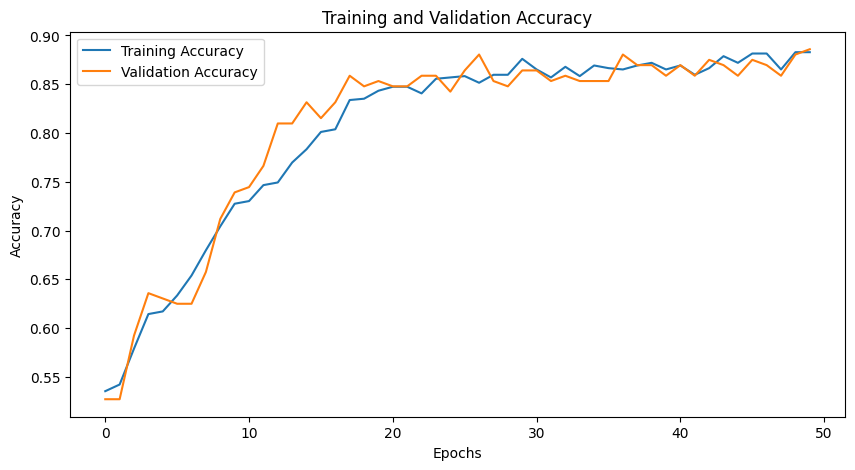

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

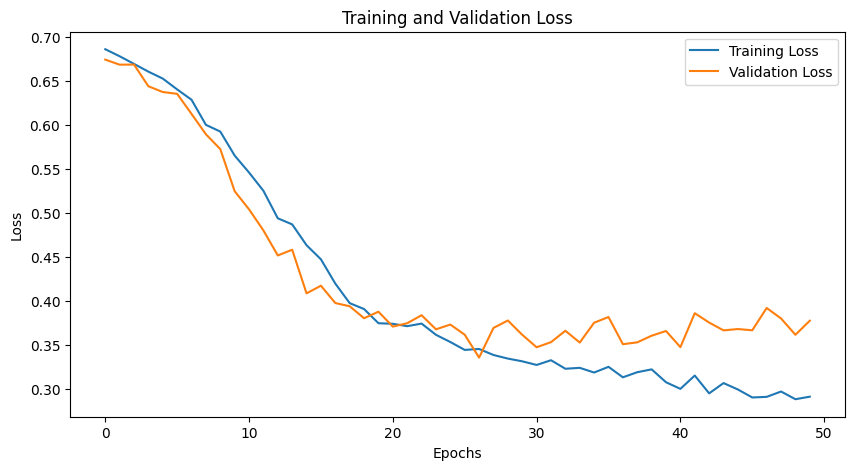

In [ ]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()